<!-- dom:TITLE: Data Analysis and Machine Learning: From Decision Trees to Forests and all that -->
# Data Analysis and Machine Learning: From Decision Trees to Forests and all that
<!-- dom:AUTHOR: Morten Hjorth-Jensen at Department of Physics, University of Oslo & Department of Physics and Astronomy and National Superconducting Cyclotron Laboratory, Michigan State University -->
<!-- Author: -->  
**Morten Hjorth-Jensen**, Department of Physics, University of Oslo and Department of Physics and Astronomy and National Superconducting Cyclotron Laboratory, Michigan State University

Date: **May 26, 2020**

Copyright 1999-2020, Morten Hjorth-Jensen. Released under CC Attribution-NonCommercial 4.0 license




## Decision trees, overarching aims


We start here with the most basic algorithm, the so-called decision
tree. With this basic algorithm we can in turn build more complex
networks, spanning from homogeneous and heterogenous forests (bagging,
random forests and more) to one of the most popular supervised
algorithms nowadays, the extreme gradient boosting, or just
XGBoost. But let us start with the simplest possible ingredient.

Decision trees are supervised learning algorithms used for both,
classification and regression tasks.


The main idea of decision trees
is to find those descriptive features which contain the most
**information** regarding the target feature and then split the dataset
along the values of these features such that the target feature values
for the resulting underlying datasets are as pure as possible.

The descriptive features which reproduce best the target/output features are normally  said
to be the most informative ones. The process of finding the **most
informative** feature is done until we accomplish a stopping criteria
where we then finally end up in so called **leaf nodes**. 



A decision tree is typically divided into a **root node**, the **interior nodes**,
and the final **leaf nodes** or just **leaves**. These entities are then connected by so-called **branches**.

The leaf nodes
contain the predictions we will make for new query instances presented
to our trained model. This is possible since the model has 
learned the underlying structure of the training data and hence can,
given some assumptions, make predictions about the target feature value
(class) of unseen query instances.

## A typical Decision Tree with its pertinent Jargon, Classification Problem

<!-- dom:FIGURE: [DataFiles/cancer.png, width=600 frac=0.8] -->
<!-- begin figure -->

<p></p>
<img src="DataFiles/cancer.png" width=600>

<!-- end figure -->


This tree was produced using the Wisconsin cancer data (discussed here as well, see code examples below) using **Scikit-Learn**'s decision tree classifier. Here we have used the so-called **gini** index (see below) to split the various branches.



## General Features

The overarching approach to decision trees is a top-down approach.

* A leaf provides the classification of a given instance.

* A node specifies a test of some attribute of the instance.

* A branch corresponds to a possible values of an attribute.

* An instance is classified by starting at the root node of the tree, testing the attribute specified by this node, then moving down the tree branch corresponding to the value of the attribute in the given example.

This process is then repeated for the subtree rooted at the new
node.


## How do we set it up?


In simplified terms, the process of training a decision tree and
predicting the target features of query instances is as follows:

1. Present a dataset containing of a number of training instances characterized by a number of descriptive features and a target feature

2. Train the decision tree model by continuously splitting the target feature along the values of the descriptive features using a measure of information gain during the training process

3. Grow the tree until we accomplish a stopping criteria create leaf nodes which represent the *predictions* we want to make for new query instances

4. Show query instances to the tree and run down the tree until we arrive at leaf nodes

Then we are essentially done!





## Decision trees and Regression

2nd degree coefficients:
zero power:  2.5469848425961903
first power:  -0.30236469980754704
second power:  0.000997007657191639


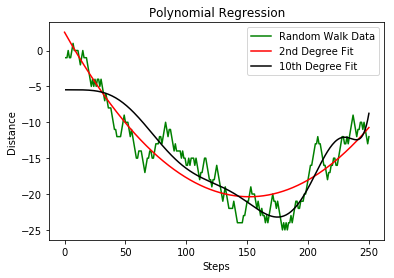

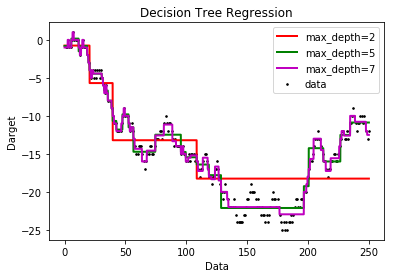

In [11]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

steps=250

distance=0
x=0
distance_list=[]
steps_list=[]
while x<steps:
    distance+=np.random.randint(-1,2)
    distance_list.append(distance)
    x+=1
    steps_list.append(x)
plt.plot(steps_list,distance_list, color='green', label="Random Walk Data")

steps_list=np.asarray(steps_list)
distance_list=np.asarray(distance_list)

X=steps_list[:,np.newaxis]

#Polynomial fits

#Degree 2
poly_features=PolynomialFeatures(degree=2, include_bias=False)
X_poly=poly_features.fit_transform(X)

lin_reg=LinearRegression()
poly_fit=lin_reg.fit(X_poly,distance_list)
b=lin_reg.coef_
c=lin_reg.intercept_
print ("2nd degree coefficients:")
print ("zero power: ",c)
print ("first power: ", b[0])
print ("second power: ",b[1])

z = np.arange(0, steps, .01)
z_mod=b[1]*z**2+b[0]*z+c

fit_mod=b[1]*X**2+b[0]*X+c
plt.plot(z, z_mod, color='r', label="2nd Degree Fit")
plt.title("Polynomial Regression")

plt.xlabel("Steps")
plt.ylabel("Distance")

#Degree 10
poly_features10=PolynomialFeatures(degree=10, include_bias=False)
X_poly10=poly_features10.fit_transform(X)

poly_fit10=lin_reg.fit(X_poly10,distance_list)

y_plot=poly_fit10.predict(X_poly10)
plt.plot(X, y_plot, color='black', label="10th Degree Fit")

plt.legend()
plt.show()


#Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
regr_1=DecisionTreeRegressor(max_depth=2)
regr_2=DecisionTreeRegressor(max_depth=5)
regr_3=DecisionTreeRegressor(max_depth=7)
regr_1.fit(X, distance_list)
regr_2.fit(X, distance_list)
regr_3.fit(X, distance_list)

X_test = np.arange(0.0, steps, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3=regr_3.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, distance_list, s=2.5, c="black", label="data")
plt.plot(X_test, y_1, color="red",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="green", label="max_depth=5", linewidth=2)
plt.plot(X_test, y_3, color="m", label="max_depth=7", linewidth=2)

plt.xlabel("Data")
plt.ylabel("Darget")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

## Building a tree, regression

There are mainly two steps
1. We split the predictor space (the set of possible values $x_1,x_2,\dots, x_p$) into $J$ distinct and non-non-overlapping regions, $R_1,R_2,\dots,R_J$.  

2. For every observation that falls into the region $R_j$ , we make the same prediction, which is simply the mean of the response values for the training observations in $R_j$.

How do we construct the regions $R_1,\dots,R_J$?  In theory, the
regions could have any shape. However, we choose to divide the
predictor space into high-dimensional rectangles, or boxes, for
simplicity and for ease of interpretation of the resulting predictive
model. The goal is to find boxes $R_1,\dots,R_J$ that minimize the
MSE, given by

$$
\sum_{j=1}^J\sum_{i\in R_j}(y_i-\overline{y}_{R_j})^2,
$$

where $\overline{y}_{R_j}$  is the mean response for the training observations 
within box $j$. 

## A top-down approach, recursive binary splitting

Unfortunately, it is computationally infeasible to consider every
possible partition of the feature space into $J$ boxes.  The common
strategy is to take a top-down approach

The approach is top-down because it begins at the top of the tree (all
observations belong to a single region) and then successively splits
the predictor space; each split is indicated via two new branches
further down on the tree. It is greedy because at each step of the
tree-building process, the best split is made at that particular step,
rather than looking ahead and picking a split that will lead to a
better tree in some future step.

## Making a tree

In order to implement the recursive binary splitting we start by selecting
the predictor $x_j$ and a cutpoint $s$ that splits the predictor space into two regions $R_1$ and $R_2$

$$
\left\{X\vert x_j < s\right\},
$$

and

$$
\left\{X\vert x_j \geq s\right\},
$$

so that we obtain the lowest MSE, that is

$$
\sum_{i:x_i\in R_j}(y_i-\overline{y}_{R_1})^2+\sum_{i:x_i\in R_2}(y_i-\overline{y}_{R_2})^2,
$$

which we want to minimize by considering all predictors
$x_1,x_2,\dots,x_p$.  We consider also all possible values of $s$ for
each predictor. These values could be determined by randomly assigned
numbers or by starting at the midpoint and then proceed till we find
an optimal value.

For any $j$ and $s$, we define the pair of half-planes where
$\overline{y}_{R_1}$ is the mean response for the training
observations in $R_1(j,s)$, and $\overline{y}_{R_2}$ is the mean
response for the training observations in $R_2(j,s)$.

Finding the values of $j$ and $s$ that minimize the above equation can be
done quite quickly, especially when the number of features $p$ is not
too large.

Next, we repeat the process, looking
for the best predictor and best cutpoint in order to split the data
further so as to minimize the MSE within each of the resulting
regions. However, this time, instead of splitting the entire predictor
space, we split one of the two previously identified regions. We now
have three regions. Again, we look to split one of these three regions
further, so as to minimize the MSE. The process continues until a
stopping criterion is reached; for instance, we may continue until no
region contains more than five observations.

<!-- !split  -->
## Pruning the tree

The above procedure is rather straightforward, but leads often to
overfitting and unnecessarily large and complicated trees. The basic
idea is to grow a large tree $T_0$ and then prune it back in order to
obtain a subtree. A smaller tree with fewer splits (fewer regions) can
lead to smaller variance and better interpretation at the cost of a
little more bias.

The so-called Cost complexity pruning algorithm gives us a
way to do just this. Rather than considering every possible subtree,
we consider a sequence of trees indexed by a nonnegative tuning
parameter $\alpha$.

## Cost complexity pruning
For each value of $\alpha$  there corresponds a subtree $T \in T_0$ such that

$$
\sum_{m=1}^{\overline{T}}\sum_{i:x_i\in R_m}(y_i-\overline{y}_{R_m})^2+\alpha\overline{T},
$$

is as small as possible. Here $\overline{T}$ is 
the number of terminal nodes of the tree $T$ , $R_m$ is the
rectangle (i.e. the subset of predictor space)  corresponding to the $m$-th terminal node.

The tuning parameter $\alpha$ controls a trade-off between the subtree’s
com- plexity and its fit to the training data. When $\alpha = 0$, then the
subtree $T$ will simply equal $T_0$, 
because then the above equation just measures the
training error. 
However, as $\alpha$ increases, there is a price to pay for
having a tree with many terminal nodes. The above equation will
tend to be minimized for a smaller subtree. 


It turns out that as we increase $\alpha$ from zero
branches get pruned from the tree in a nested and predictable fashion,
so obtaining the whole sequence of subtrees as a function of $\alpha$ is
easy. We can select a value of $\alpha$ using a validation set or using
cross-validation. We then return to the full data set and obtain the
subtree corresponding to $\alpha$. 


## Schematic Regression Procedure

**Building a Regression Tree.**

1. Use recursive binary splitting to grow a large tree on the training data, stopping only when each terminal node has fewer than some minimum number of observations.

2. Apply cost complexity pruning to the large tree in order to obtain a sequence of best subtrees, as a function of $\alpha$.

3. Use for example $K$-fold cross-validation to choose $\alpha$. Divide the training observations into $K$ folds. For each $k=1,2,\dots,K$ we: 

  * repeat steps 1 and 2 on all but the $k$-th fold of the training data. 

  * Then we valuate the mean squared prediction error on the data in the left-out $k$-th fold, as a function of $\alpha$.

  * Finally  we average the results for each value of $\alpha$, and pick $\alpha$ to minimize the average error.


4. Return the subtree from Step 2 that corresponds to the chosen value of $\alpha$.




## A Classification Tree

A classification tree is very similar to a regression tree, except
that it is used to predict a qualitative response rather than a
quantitative one. Recall that for a regression tree, the predicted
response for an observation is given by the mean response of the
training observations that belong to the same terminal node. In
contrast, for a classification tree, we predict that each observation
belongs to the most commonly occurring class of training observations
in the region to which it belongs. In interpreting the results of a
classification tree, we are often interested not only in the class
prediction corresponding to a particular terminal node region, but
also in the class proportions among the training observations that
fall into that region.  

## Growing a classification tree

The task of growing a
classification tree is quite similar to the task of growing a
regression tree. Just as in the regression setting, we use recursive
binary splitting to grow a classification tree. However, in the
classification setting, the MSE cannot be used as a criterion for making
the binary splits.  A natural alternative to MSE is the **classification
error rate**. Since we plan to assign an observation in a given region
to the most commonly occurring error rate class of training
observations in that region, the classification error rate is simply
the fraction of the training observations in that region that do not
belong to the most common class. 

When building a classification tree, either the Gini index or the
entropy are typically used to evaluate the quality of a particular
split, since these two approaches are more sensitive to node purity
than is the classification error rate. 


## Classification tree, how to split nodes

If our targets are the outcome of a classification process that takes
for example $k=1,2,\dots,K$ values, the only thing we need to think of
is to set up the splitting criteria for each node.

We define a PDF $p_{mk}$ that represents the number of observations of
a class $k$ in a region $R_m$ with $N_m$ observations. We represent
this likelihood function in terms of the proportion $I(y_i=k)$ of
observations of this class in the region $R_m$ as

$$
p_{mk} = \frac{1}{N_m}\sum_{x_i\in R_m}I(y_i=k).
$$

We let $p_{mk}$ represent the majority class of observations in region
$m$. The three most common ways of splitting a node are given by

* Misclassification error

$$
p_{mk} = \frac{1}{N_m}\sum_{x_i\in R_m}I(y_i\ne k) = 1-p_{mk}.
$$

* Gini index $g$

$$
g = \sum_{k=1}^K p_{mk}(1-p_{mk}).
$$

* Information entropy or just entropy $s$

$$
s = -\sum_{k=1}^K p_{mk}\log{p_{mk}}.
$$

## Visualizing the Tree, Classification

In [12]:
import os
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz

from IPython.display import Image 
from pydot import graph_from_dot_data
import pandas as pd
import numpy as np


cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
print(X)
y = pd.Categorical.from_codes(cancer.target, cancer.target_names)
y = pd.get_dummies(y)
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
tree_clf = DecisionTreeClassifier(max_depth=5)
tree_clf.fit(X_train, y_train)

export_graphviz(
    tree_clf,
    out_file="DataFiles/cancer.dot",
    feature_names=cancer.feature_names,
    class_names=cancer.target_names,
    rounded=True,
    filled=True
)
cmd = 'dot -Tpng DataFiles/cancer.dot -o DataFiles/cancer.png'
os.system(cmd)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0         17.990         10.38          122.80     1001.0          0.11840   
1         20.570         17.77          132.90     1326.0          0.08474   
2         19.690         21.25          130.00     1203.0          0.10960   
3         11.420         20.38           77.58      386.1          0.14250   
4         20.290         14.34          135.10     1297.0          0.10030   
5         12.450         15.70           82.57      477.1          0.12780   
6         18.250         19.98          119.60     1040.0          0.09463   
7         13.710         20.83           90.20      577.9          0.11890   
8         13.000         21.82           87.50      519.8          0.12730   
9         12.460         24.04           83.97      475.9          0.11860   
10        16.020         23.24          102.70      797.8          0.08206   
11        15.780         17.89          103.60      781.0       

0

## Visualizing the Tree, The Moons

In [3]:
# Common imports
import numpy as np
from sklearn.model_selection import  train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons
from sklearn.tree import export_graphviz
from pydot import graph_from_dot_data
import pandas as pd
import os

np.random.seed(42)
X, y = make_moons(n_samples=100, noise=0.25, random_state=53)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
tree_clf = DecisionTreeClassifier(max_depth=5)
tree_clf.fit(X_train, y_train)

export_graphviz(
    tree_clf,
    out_file="DataFiles/moons.dot",
    rounded=True,
    filled=True
)
cmd = 'dot -Tpng DataFiles/moons.dot -o DataFiles/moons.png'
os.system(cmd)

## Algorithms for Setting up Decision Trees

Two algorithms stand out in the set up of decision trees:
1. The CART (Classification And Regression Tree) algorithm for both classification and regression

2. The ID3 algorithm based on the computation of the information gain for classification

We discuss both algorithms with applications here. The popular library
**Scikit-Learn** uses the CART algorithm. For classification problems
you can use either the **gini** index or the **entropy** to split a tree
in two branches.

## The CART algorithm for Classification

For classification, the CART algorithm splits the data set in two subsets using a single feature $k$ and a threshold $t_k$.
This could be for example a threshold set by a number below a certain circumference of a malign tumor.

How do we find these two quantities?
We search for the pair $(k,t_k)$ that produces the purest subset using for example the **gini** factor $G$.
The cost function it tries to minimize is then

$$
C(k,t_k) = \frac{m_{\mathrm{left}}}{m}G_{\mathrm{left}}+ \frac{m_{\mathrm{right}}}{m}G_{\mathrm{right}},
$$

where $G_{\mathrm{left/right}}$ measures the impurity of the left/right subset  and $m_{\mathrm{left/right}}$
 is the number of instances in the left/right subset

Once it has successfully split the training set in two, it splits the subsets using the same logic, then the subsubsets
and so on, recursively. It stops recursing once it reaches the maximum depth (defined by the
$max\_depth$ hyperparameter), or if it cannot find a split that will reduce impurity. A few other
hyperparameters control additional stopping conditions such as the $min\_samples\_split$,
$min\_samples\_leaf$, $min\_weight\_fraction\_leaf$, and $max\_leaf\_nodes$.

## The CART algorithm for Regression

The CART algorithm for regression works is similar to the one for classification except that instead of trying to split the
training set in a way that minimizes say the **gini** or **entropy** impurity, it now tries to split the training set in a way that minimizes our well-known mean-squared error (MSE). The cost function is now

$$
C(k,t_k) = \frac{m_{\mathrm{left}}}{m}\mathrm{MSE}_{\mathrm{left}}+ \frac{m_{\mathrm{right}}}{m}\mathrm{MSE}_{\mathrm{right}}.
$$

Here the MSE for a specific node is defined as

$$
\mathrm{MSE}_{\mathrm{node}}=\frac{1}{m_\mathrm{node}}\sum_{i\in \mathrm{node}}(\overline{y}_{\mathrm{node}}-y_i)^2,
$$

with

$$
\overline{y}_{\mathrm{node}}=\frac{1}{m_\mathrm{node}}\sum_{i\in \mathrm{node}}y_i,
$$

the mean value of all observations in a specific node.

Without any regularization, the regression task for decision trees, 
just like for classification tasks, is  prone to overfitting.


## Computing the Gini index

The example we will look at is a classical one in many Machine
Learning applications. Based on various meteorological features, we
have several so-called attributes which decide whether we at the end
will do some outdoor activity like skiing, going for a bike ride etc
etc.  The table here contains the feautures **outlook**, **temperature**,
**humidity** and **wind**.  The target or output is whether we ride
(True=1) or whether we do something else that day (False=0). The
attributes for each feature are then sunny, overcast and rain for the
outlook, hot, cold and mild for temperature, high and normal for
humidity and weak and strong for wind.

The table here summarizes the various attributes and
<table border="1">
<thead>
<tr><th align="center">Day</th> <th align="center">Outlook </th> <th align="center">Temperature</th> <th align="center">Humidity</th> <th align="center"> Wind </th> <th align="center">Ride</th> </tr>
</thead>
<tbody>
<tr><td align="center">   1      </td> <td align="center">   Sunny       </td> <td align="center">   Hot            </td> <td align="center">   High        </td> <td align="center">   Weak      </td> <td align="center">   0       </td> </tr>
<tr><td align="center">   2      </td> <td align="center">   Sunny       </td> <td align="center">   Hot            </td> <td align="center">   High        </td> <td align="center">   Strong    </td> <td align="center">   1       </td> </tr>
<tr><td align="center">   3      </td> <td align="center">   Overcast    </td> <td align="center">   Hot            </td> <td align="center">   High        </td> <td align="center">   Weak      </td> <td align="center">   1       </td> </tr>
<tr><td align="center">   4      </td> <td align="center">   Rain        </td> <td align="center">   Mild           </td> <td align="center">   High        </td> <td align="center">   Weak      </td> <td align="center">   1       </td> </tr>
<tr><td align="center">   5      </td> <td align="center">   Rain        </td> <td align="center">   Cool           </td> <td align="center">   Normal      </td> <td align="center">   Weak      </td> <td align="center">   1       </td> </tr>
<tr><td align="center">   6      </td> <td align="center">   Rain        </td> <td align="center">   Cool           </td> <td align="center">   Normal      </td> <td align="center">   Strong    </td> <td align="center">   0       </td> </tr>
<tr><td align="center">   7      </td> <td align="center">   Overcast    </td> <td align="center">   Cool           </td> <td align="center">   Normal      </td> <td align="center">   Strong    </td> <td align="center">   1       </td> </tr>
<tr><td align="center">   8      </td> <td align="center">   Sunny       </td> <td align="center">   Mild           </td> <td align="center">   High        </td> <td align="center">   Weak      </td> <td align="center">   0       </td> </tr>
<tr><td align="center">   9      </td> <td align="center">   Sunny       </td> <td align="center">   Cool           </td> <td align="center">   Normal      </td> <td align="center">   Weak      </td> <td align="center">   1       </td> </tr>
<tr><td align="center">   10     </td> <td align="center">   Rain        </td> <td align="center">   Mild           </td> <td align="center">   Normal      </td> <td align="center">   Weak      </td> <td align="center">   1       </td> </tr>
<tr><td align="center">   11     </td> <td align="center">   Sunny       </td> <td align="center">   Mild           </td> <td align="center">   Normal      </td> <td align="center">   Strong    </td> <td align="center">   1       </td> </tr>
<tr><td align="center">   12     </td> <td align="center">   Overcast    </td> <td align="center">   Mild           </td> <td align="center">   High        </td> <td align="center">   Strong    </td> <td align="center">   1       </td> </tr>
<tr><td align="center">   13     </td> <td align="center">   Overcast    </td> <td align="center">   Hot            </td> <td align="center">   Normal      </td> <td align="center">   Weak      </td> <td align="center">   1       </td> </tr>
<tr><td align="center">   14     </td> <td align="center">   Rain        </td> <td align="center">   Mild           </td> <td align="center">   High        </td> <td align="center">   Strong    </td> <td align="center">   0       </td> </tr>
</tbody>
</table>

## Simple Python Code to read in Data and perform Classification

In [13]:
# Common imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from IPython.display import Image 
from pydot import graph_from_dot_data
import os

# Where to save the figures and data files
PROJECT_ROOT_DIR = "Results"
FIGURE_ID = "Results/FigureFiles"
DATA_ID = "DataFiles/"

if not os.path.exists(PROJECT_ROOT_DIR):
    os.mkdir(PROJECT_ROOT_DIR)

if not os.path.exists(FIGURE_ID):
    os.makedirs(FIGURE_ID)

if not os.path.exists(DATA_ID):
    os.makedirs(DATA_ID)

def image_path(fig_id):
    return os.path.join(FIGURE_ID, fig_id)

def data_path(dat_id):
    return os.path.join(DATA_ID, dat_id)

def save_fig(fig_id):
    plt.savefig(image_path(fig_id) + ".png", format='png')

infile = open(data_path("rideclass.csv"),'r')

# Read the experimental data with Pandas
from IPython.display import display
ridedata = pd.read_csv(infile,names = ('Outlook','Temperature','Humidity','Wind','Ride'))
ridedata = pd.DataFrame(ridedata)

# Features and targets
X = ridedata.loc[:, ridedata.columns != 'Ride'].values
y = ridedata.loc[:, ridedata.columns == 'Ride'].values

# Create the encoder.
encoder = OneHotEncoder(handle_unknown="ignore")
# Assume for simplicity all features are categorical.
encoder.fit(X)    
# Apply the encoder.
X = encoder.transform(X)
print(X)
# Then do a Classification tree
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)
print("Train set accuracy with Decision Tree: {:.2f}".format(tree_clf.score(X,y)))
#transfer to a decision tree graph
export_graphviz(
    tree_clf,
    out_file="DataFiles/ride.dot",
    rounded=True,
    filled=True
)
cmd = 'dot -Tpng DataFiles/cancer.dot -o DataFiles/cancer.png'
os.system(cmd)

  (0, 0)	1.0
  (0, 7)	1.0
  (0, 9)	1.0
  (0, 13)	1.0
  (1, 3)	1.0
  (1, 5)	1.0
  (1, 8)	1.0
  (1, 12)	1.0
  (2, 3)	1.0
  (2, 5)	1.0
  (2, 8)	1.0
  (2, 11)	1.0
  (3, 1)	1.0
  (3, 5)	1.0
  (3, 8)	1.0
  (3, 12)	1.0
  (4, 2)	1.0
  (4, 6)	1.0
  (4, 8)	1.0
  (4, 12)	1.0
  (5, 2)	1.0
  (5, 4)	1.0
  (5, 10)	1.0
  (5, 12)	1.0
  (6, 2)	1.0
  :	:
  (8, 12)	1.0
  (9, 3)	1.0
  (9, 4)	1.0
  (9, 10)	1.0
  (9, 12)	1.0
  (10, 2)	1.0
  (10, 6)	1.0
  (10, 10)	1.0
  (10, 12)	1.0
  (11, 3)	1.0
  (11, 6)	1.0
  (11, 10)	1.0
  (11, 11)	1.0
  (12, 1)	1.0
  (12, 6)	1.0
  (12, 8)	1.0
  (12, 11)	1.0
  (13, 1)	1.0
  (13, 5)	1.0
  (13, 10)	1.0
  (13, 12)	1.0
  (14, 2)	1.0
  (14, 6)	1.0
  (14, 8)	1.0
  (14, 11)	1.0
Train set accuracy with Decision Tree: 0.73


0

## Computing the Gini Factor

The above functions (gini, entropy and misclassification error) are
important components of the so-called CART algorithm. We will discuss
this algorithm below after we have discussed the information gain
algorithm ID3.

In the example here we have converted all our attributes into numerical values $0,1,2$ etc.

In [14]:
# Split a dataset based on an attribute and an attribute value
def test_split(index, value, dataset):
	left, right = list(), list()
	for row in dataset:
		if row[index] < value:
			left.append(row)
		else:
			right.append(row)
	return left, right
 
# Calculate the Gini index for a split dataset
def gini_index(groups, classes):
	# count all samples at split point
	n_instances = float(sum([len(group) for group in groups]))
	# sum weighted Gini index for each group
	gini = 0.0
	for group in groups:
		size = float(len(group))
		# avoid divide by zero
		if size == 0:
			continue
		score = 0.0
		# score the group based on the score for each class
		for class_val in classes:
			p = [row[-1] for row in group].count(class_val) / size
			score += p * p
		# weight the group score by its relative size
		gini += (1.0 - score) * (size / n_instances)
	return gini

# Select the best split point for a dataset
def get_split(dataset):
	class_values = list(set(row[-1] for row in dataset))
	b_index, b_value, b_score, b_groups = 999, 999, 999, None
	for index in range(len(dataset[0])-1):
		for row in dataset:
			groups = test_split(index, row[index], dataset)
			gini = gini_index(groups, class_values)
			print('X%d < %.3f Gini=%.3f' % ((index+1), row[index], gini))
			if gini < b_score:
				b_index, b_value, b_score, b_groups = index, row[index], gini, groups
	return {'index':b_index, 'value':b_value, 'groups':b_groups}
 
dataset = [[0,0,0,0,0],
            [0,0,0,1,1],
            [1,0,0,0,1],
            [2,1,0,0,1],
            [2,2,1,0,1],
            [2,2,1,1,0],
            [1,2,1,1,1],
            [0,1,0,0,0],
            [0,2,1,0,1],
            [2,1,1,0,1],
            [0,1,1,1,1],
            [1,1,0,1,1],
            [1,0,1,0,1],
            [2,1,0,1,0]]

split = get_split(dataset)
print('Split: [X%d < %.3f]' % ((split['index']+1), split['value']))

X1 < 0.000 Gini=0.408
X1 < 0.000 Gini=0.408
X1 < 1.000 Gini=0.394
X1 < 2.000 Gini=0.394
X1 < 2.000 Gini=0.394
X1 < 2.000 Gini=0.394
X1 < 1.000 Gini=0.394
X1 < 0.000 Gini=0.408
X1 < 0.000 Gini=0.408
X1 < 2.000 Gini=0.394
X1 < 0.000 Gini=0.408
X1 < 1.000 Gini=0.394
X1 < 1.000 Gini=0.394
X1 < 2.000 Gini=0.394
X2 < 0.000 Gini=0.408
X2 < 0.000 Gini=0.408
X2 < 0.000 Gini=0.408
X2 < 1.000 Gini=0.407
X2 < 2.000 Gini=0.407
X2 < 2.000 Gini=0.407
X2 < 2.000 Gini=0.407
X2 < 1.000 Gini=0.407
X2 < 2.000 Gini=0.407
X2 < 1.000 Gini=0.407
X2 < 1.000 Gini=0.407
X2 < 1.000 Gini=0.407
X2 < 0.000 Gini=0.408
X2 < 1.000 Gini=0.407
X3 < 0.000 Gini=0.408
X3 < 0.000 Gini=0.408
X3 < 0.000 Gini=0.408
X3 < 0.000 Gini=0.408
X3 < 1.000 Gini=0.367
X3 < 1.000 Gini=0.367
X3 < 1.000 Gini=0.367
X3 < 0.000 Gini=0.408
X3 < 1.000 Gini=0.367
X3 < 1.000 Gini=0.367
X3 < 1.000 Gini=0.367
X3 < 0.000 Gini=0.408
X3 < 1.000 Gini=0.367
X3 < 0.000 Gini=0.408
X4 < 0.000 Gini=0.408
X4 < 1.000 Gini=0.405
X4 < 0.000 Gini=0.408
X4 < 0.000

## Entropy and the ID3 algorithm

ID3, learns decision trees by constructing
them topdown, beginning with the question **which attribute should be tested at the root of the tree**?

1. Each instance attribute is evaluated using a statistical test to determine how well it alone classifies the training examples.

2. The best attribute is selected and used as the test at the root node of the tree.

3. A descendant of the root node is then created for each possible value of this attribute.

4. Training examples are sorted to the appropriate descendant node.

5. The entire process is then repeated using the training examples associated with each descendant node to select the best attribute to test at that point in the tree.

6. This forms a greedy search for an acceptable decision tree, in which the algorithm never backtracks to reconsider earlier choices. 

The ID3 algorithm selects, which attribute to test at each node in the
tree.

We would like to select the attribute that is most useful for classifying
examples.

What is a good quantitative measure of the worth of an attribute?

Information gain measures how well a given attribute separates the
training examples according to their target classification.

The ID3 algorithm uses this information gain measure to select among the candidate
attributes at each step while growing the tree.


## Cancer Data again now with Decision Trees and other Methods

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import  train_test_split 
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Load the data
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,random_state=0)
print(X_train.shape)
print(X_test.shape)
# Logistic Regression
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, y_train)
print("Test set accuracy with Logistic Regression: {:.2f}".format(logreg.score(X_test,y_test)))
# Support vector machine
svm = SVC(gamma='auto', C=100)
svm.fit(X_train, y_train)
print("Test set accuracy with SVM: {:.2f}".format(svm.score(X_test,y_test)))
# Decision Trees
deep_tree_clf = DecisionTreeClassifier(max_depth=None)
deep_tree_clf.fit(X_train, y_train)
print("Test set accuracy with Decision Trees: {:.2f}".format(deep_tree_clf.score(X_test,y_test)))
#now scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Logistic Regression
logreg.fit(X_train_scaled, y_train)
print("Test set accuracy Logistic Regression with scaled data: {:.2f}".format(logreg.score(X_test_scaled,y_test)))
# Support Vector Machine
svm.fit(X_train_scaled, y_train)
print("Test set accuracy SVM with scaled data: {:.2f}".format(logreg.score(X_test_scaled,y_test)))
# Decision Trees
deep_tree_clf.fit(X_train_scaled, y_train)
print("Test set accuracy with Decision Trees and scaled data: {:.2f}".format(deep_tree_clf.score(X_test_scaled,y_test)))

(426, 30)
(143, 30)
Test set accuracy with Logistic Regression: 0.95
Test set accuracy with SVM: 0.63
Test set accuracy with Decision Trees: 0.90
Test set accuracy Logistic Regression with scaled data: 0.96
Test set accuracy SVM with scaled data: 0.96
Test set accuracy with Decision Trees and scaled data: 0.88


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


## Pros and cons of trees, pros

* White box, easy to interpret model. Some people believe that decision trees more closely mirror human decision-making than do the regression and classification approaches discussed earlier (think of support vector machines)

* Trees are very easy to explain to people. In fact, they are even easier to explain than linear regression!

* No feature normalization needed

* Tree models can handle both continuous and categorical data (Classification and Regression Trees)

* Can model nonlinear relationships

* Can model interactions between the different descriptive features

* Trees can be displayed graphically, and are easily interpreted even by a non-expert (especially if they are small)

## Disadvantages

* Unfortunately, trees generally do not have the same level of predictive accuracy as some of the other regression and classification approaches

* If continuous features are used the tree may become quite large and hence less interpretable

* Decision trees are prone to overfit the training data and hence do not well generalize the data if no stopping criteria or improvements like pruning, boosting or bagging are implemented

* Small changes in the data may lead to a completely different tree. This issue can be addressed by using ensemble methods like bagging, boosting or random forests

* Unbalanced datasets where some target feature values occur much more frequently than others may lead to biased trees since the frequently occurring feature values are preferred over the less frequently occurring ones. 

* If the number of features is relatively large (high dimensional) and the number of instances is relatively low, the tree might overfit the data

* Features with many levels may be preferred over features with less levels since for them it is *more easy* to split the dataset such that the sub datasets only contain pure target feature values. This issue can be addressed by preferring for instance the information gain ratio as splitting criteria over information gain

However, by aggregating many decision trees, using methods like
bagging, random forests, and boosting, the predictive performance of
trees can be substantially improved.


## Ensemble Methods: From a Single Tree to Many Trees and Extreme Boosting, Meet the Jungle of Methods

As stated above and seen in many of the examples discussed here about
a single decision tree, we often end up overfitting our training
data. This normally means that we have a high variance. Can we reduce
the variance of a statistical learning method?

This leads us to a set of different methods that can combine different
machine learning algorithms or just use one of them to construct
forests and jungles of trees, homogeneous ones or heterogenous
ones. These methods are recognized by different names which we will
try to explain here. These are

1. Voting classifiers

2. Bagging and Pasting

3. Random forests

4. Boosting methods, from adaptive to Extreme Gradient Boosting (XGBoost)

We discuss these methods here.


## An Overview of Ensemble Methods

<!-- dom:FIGURE: [DataFiles/ensembleoverview.png, width=600 frac=0.8] -->
<!-- begin figure -->

<p></p>
<img src="DataFiles/ensembleoverview.png" width=600>

<!-- end figure -->




## Bagging

The **plain** decision trees suffer from high
variance. This means that if we split the training data into two parts
at random, and fit a decision tree to both halves, the results that we
get could be quite different. In contrast, a procedure with low
variance will yield similar results if applied repeatedly to distinct
data sets; linear regression tends to have low variance, if the ratio
of $n$ to $p$ is moderately large. 

**Bootstrap aggregation**, or just **bagging**, is a
general-purpose procedure for reducing the variance of a statistical
learning method. 


## More bagging

Bagging typically results in improved accuracy
over prediction using a single tree. Unfortunately, however, it can be
difficult to interpret the resulting model. Recall that one of the
advantages of decision trees is the attractive and easily interpreted
diagram that results.

However, when we bag a large number of trees, it is no longer
possible to represent the resulting statistical learning procedure
using a single tree, and it is no longer clear which variables are
most important to the procedure. Thus, bagging improves prediction
accuracy at the expense of interpretability.  Although the collection
of bagged trees is much more difficult to interpret than a single
tree, one can obtain an overall summary of the importance of each
predictor using the MSE (for bagging regression trees) or the Gini
index (for bagging classification trees). In the case of bagging
regression trees, we can record the total amount that the MSE is
decreased due to splits over a given predictor, averaged over all $B$ possible
trees. A large value indicates an important predictor. Similarly, in
the context of bagging classification trees, we can add up the total
amount that the Gini index  is decreased by splits over a given
predictor, averaged over all $B$ trees.


## Making your own Bootstrap: Changing the Level of the Decision Tree

Let us bring up our good old boostrap example from the linear regression lectures. We change the linerar regression algorithm with
a decision tree wth different depths and perform a bootstrap aggregate (in this case we perform as many bootstraps as data points $n$).

Polynomial degree: 1
Error: 0.054954863270618805
Bias^2: 0.040194039771880165
Var: 0.014760823498738637
0.054954863270618805 >= 0.040194039771880165 + 0.014760823498738637 = 0.0549548632706188
Polynomial degree: 2
Error: 0.03629243653743182
Bias^2: 0.023535969592326924
Var: 0.012756466945104895
0.03629243653743182 >= 0.023535969592326924 + 0.012756466945104895 = 0.03629243653743182
Polynomial degree: 3
Error: 0.02431674510678796
Bias^2: 0.012962406873335813
Var: 0.01135433823345216
0.02431674510678796 >= 0.012962406873335813 + 0.01135433823345216 = 0.024316745106787975
Polynomial degree: 4
Error: 0.017560916651694063
Bias^2: 0.009704194504495525
Var: 0.007856722147198531
0.017560916651694063 >= 0.009704194504495525 + 0.007856722147198531 = 0.017560916651694056
Polynomial degree: 5
Error: 0.016259590367844724
Bias^2: 0.009195183660593652
Var: 0.00706440670725107
0.016259590367844724 >= 0.009195183660593652 + 0.00706440670725107 = 0.01625959036784472
Polynomial degree: 6
Error: 0.0183615

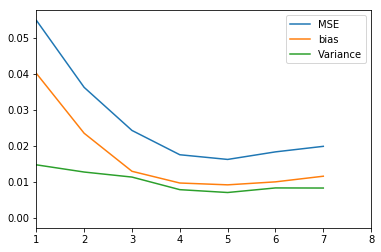

In [16]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample
from sklearn.tree import DecisionTreeRegressor

n = 100
n_boostraps = 100
maxdepth = 8

# Make data set.
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)
error = np.zeros(maxdepth)
bias = np.zeros(maxdepth)
variance = np.zeros(maxdepth)
polydegree = np.zeros(maxdepth)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# we produce a simple tree first as benchmark
simpletree = DecisionTreeRegressor(max_depth=3) 
simpletree.fit(X_train_scaled, y_train)
simpleprediction = simpletree.predict(X_test_scaled)
for degree in range(1,maxdepth):
    model = DecisionTreeRegressor(max_depth=degree) 
    y_pred = np.empty((y_test.shape[0], n_boostraps))
    for i in range(n_boostraps):
        x_, y_ = resample(X_train_scaled, y_train)
        model.fit(x_, y_)
        y_pred[:, i] = model.predict(X_test_scaled)#.ravel()

    polydegree[degree] = degree
    error[degree] = np.mean( np.mean((y_test - y_pred)**2, axis=1, keepdims=True) )
    bias[degree] = np.mean( (y_test - np.mean(y_pred, axis=1, keepdims=True))**2 )
    variance[degree] = np.mean( np.var(y_pred, axis=1, keepdims=True) )
    print('Polynomial degree:', degree)
    print('Error:', error[degree])
    print('Bias^2:', bias[degree])
    print('Var:', variance[degree])
    print('{} >= {} + {} = {}'.format(error[degree], bias[degree], variance[degree], bias[degree]+variance[degree]))

mse_simpletree = np.mean(np.mean((y_test - simpleprediction)**2))
print(mse_simpletree)
plt.xlim(1,maxdepth)
plt.plot(polydegree, error, label='MSE')
plt.plot(polydegree, bias, label='bias')
plt.plot(polydegree, variance, label='Variance')
plt.legend()
save_fig("baggingboot")
plt.show()

## Random forests

Random forests provide an improvement over bagged trees by way of a
small tweak that decorrelates the trees. 

As in bagging, we build a
number of decision trees on bootstrapped training samples. But when
building these decision trees, each time a split in a tree is
considered, a random sample of $m$ predictors is chosen as split
candidates from the full set of $p$ predictors. The split is allowed to
use only one of those $m$ predictors. 

A fresh sample of $m$ predictors is
taken at each split, and typically we choose

$$
m\approx \sqrt{p}.
$$

In building a random forest, at
each split in the tree, the algorithm is not even allowed to consider
a majority of the available predictors. 

The reason for this is rather clever. Suppose that there is one very
strong predictor in the data set, along with a number of other
moderately strong predictors. Then in the collection of bagged
variable importance random forest trees, most or all of the trees will
use this strong predictor in the top split. Consequently, all of the
bagged trees will look quite similar to each other. Hence the
predictions from the bagged trees will be highly correlated.
Unfortunately, averaging many highly correlated quantities does not
lead to as large of a reduction in variance as averaging many
uncorrelated quantities. In particular, this means that bagging will
not lead to a substantial reduction in variance over a single tree in
this setting.


## Random Forest Algorithm
The algorithm described here can be applied to both classification and regression problems.

We will grow of forest of say $B$ trees.
1. For $b=1:B$

  * Draw a bootstrap sample of from the training data organized in our $\boldsymbol{X}$ matrix.

  * We grow then a random forest tree $T_b$ based on the bootstrapped data by repeating the steps outlined till we reach the maximum node size is reached

1. we select $m \le p$ variables at random from the $p$ predictors/features

2. pick the best split point among the $m$ features using either the CART algorithm or the ID3 for classification and create a new node

3. split the node into daughter nodes



4. Output then the ensemble of trees $\{T_b\}_1^{B}$ and make predictions for either a regression type of problem or a classification type of problem. 

## Random Forests Compared with other Methods on the Cancer Data

(426, 30)
(143, 30)
Test set accuracy with Logistic Regression: 0.95
Test set accuracy with SVM: 0.63
Test set accuracy with Decision Trees: 0.92
Test set accuracy Logistic Regression with scaled data: 0.96
Test set accuracy SVM with scaled data: 0.96
Test set accuracy with Decision Trees and scaled data: 0.90


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[1.         0.8        0.93333333 1.         1.         0.92857143
 1.         0.92857143 0.92857143 0.92857143]
Test set accuracy with Random Forests and scaled data: 0.98


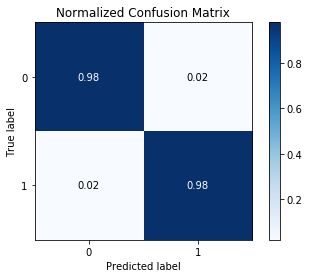

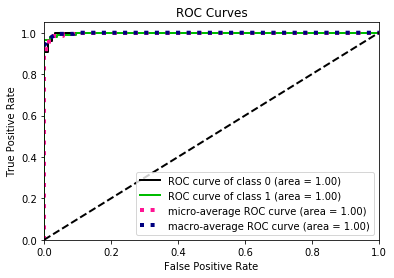

/usr/local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


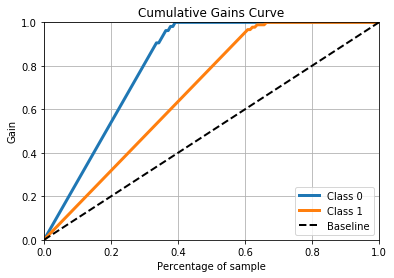

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import  train_test_split 
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Load the data
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,random_state=0)
print(X_train.shape)
print(X_test.shape)
# Logistic Regression
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, y_train)
print("Test set accuracy with Logistic Regression: {:.2f}".format(logreg.score(X_test,y_test)))
# Support vector machine
svm = SVC(gamma='auto', C=100)
svm.fit(X_train, y_train)
print("Test set accuracy with SVM: {:.2f}".format(svm.score(X_test,y_test)))
# Decision Trees
deep_tree_clf = DecisionTreeClassifier(max_depth=None)
deep_tree_clf.fit(X_train, y_train)
print("Test set accuracy with Decision Trees: {:.2f}".format(deep_tree_clf.score(X_test,y_test)))
#now scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Logistic Regression
logreg.fit(X_train_scaled, y_train)
print("Test set accuracy Logistic Regression with scaled data: {:.2f}".format(logreg.score(X_test_scaled,y_test)))
# Support Vector Machine
svm.fit(X_train_scaled, y_train)
print("Test set accuracy SVM with scaled data: {:.2f}".format(logreg.score(X_test_scaled,y_test)))
# Decision Trees
deep_tree_clf.fit(X_train_scaled, y_train)
print("Test set accuracy with Decision Trees and scaled data: {:.2f}".format(deep_tree_clf.score(X_test_scaled,y_test)))


from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
# Data set not specificied
#Instantiate the model with 500 trees and entropy as splitting criteria
Random_Forest_model = RandomForestClassifier(n_estimators=500,criterion="entropy")
Random_Forest_model.fit(X_train_scaled, y_train)
#Cross validation
accuracy = cross_validate(Random_Forest_model,X_test_scaled,y_test,cv=10)['test_score']
print(accuracy)
print("Test set accuracy with Random Forests and scaled data: {:.2f}".format(Random_Forest_model.score(X_test_scaled,y_test)))


import scikitplot as skplt
y_pred = Random_Forest_model.predict(X_test_scaled)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()
y_probas = Random_Forest_model.predict_proba(X_test_scaled)
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()
skplt.metrics.plot_cumulative_gain(y_test, y_probas)
plt.show()

## Compare  Bagging on Trees with Random Forests

In [18]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)

NameError: name 'BaggingClassifier' is not defined

In [19]:
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)
np.sum(y_pred == y_pred_rf) / len(y_pred)

NameError: name 'bag_clf' is not defined

## Boosting, a Bird's Eye View

The basic idea is to combine weak classifiers in order to create a good
classifier. With a weak classifier we often intend a classifier which
produces results which are only slightly better than we would get by
random guesses.

This is done by applying in an iterative way a weak (or a standard
classifier like decision trees) to modify the data. In each iteration
we emphasize those observations which are misclassified by weighting
them with a factor.


## What is boosting? Additive Modelling/Iterative Fitting

Boosting is a way of fitting an additive expansion in a set of
elementary basis functions like for example some simple polynomials.
Assume for example that we have a function

$$
f_M(x) = \sum_{i=1}^M \beta_m b(x;\gamma_m),
$$

where $\beta_m$ are the expansion parameters to be determined in a
minimization process and $b(x;\gamma_m)$ are some simple functions of
the multivariable parameter $x$ which is characterized by the
parameters $\gamma_m$.

As an example, consider the Sigmoid function we used in logistic
regression. In that case, we can translate the function
$b(x;\gamma_m)$ into the Sigmoid function

$$
\sigma(t) = \frac{1}{1+\exp{(-t)}},
$$

where $t=\gamma_0+\gamma_1 x$ and the parameters $\gamma_0$ and
$\gamma_1$ were determined by the Logistic Regression fitting
algorithm.

As another example, consider the cost function we defined for linear regression

$$
C(\boldsymbol{y},\boldsymbol{f}) = \frac{1}{n} \sum_{i=0}^{n-1}(y_i-f(x_i))^2.
$$

In this case the function $f(x)$ was replaced by the design matrix
$\boldsymbol{X}$ and the unknown linear regression parameters $\boldsymbol{\beta}$,
that is $\boldsymbol{f}=\boldsymbol{X}\boldsymbol{\beta}$. In linear regression we can 
simply invert a matrix and obtain the parameters $\beta$ by

$$
\boldsymbol{\beta}=\left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}.
$$

In iterative fitting or additive modeling, we minimize the cost function with respect to the parameters $\beta_m$ and $\gamma_m$.


## Iterative Fitting, Regression and Squared-error Cost Function

The way we proceed is as follows (here we specialize to the squared-error cost function)

1. Establish a cost function, here ${\cal C}(\boldsymbol{y},\boldsymbol{f}) = \frac{1}{n} \sum_{i=0}^{n-1}(y_i-f_M(x_i))^2$ with $f_M(x) = \sum_{i=1}^M \beta_m b(x;\gamma_m)$.

2. Initialize with a guess $f_0(x)$. It could be one or even zero or some random numbers.

3. For $m=1:M$

a. minimize $\sum_{i=0}^{n-1}(y_i-f_{m-1}(x_i)-\beta b(x;\gamma))^2$ wrt $\gamma$ and $\beta$

b. This gives the optimal values $\beta_m$ and $\gamma_m$

c. Determine then the new values $f_m(x)=f_{m-1}(x) +\beta_m b(x;\gamma_m)$


We could use any of the algorithms we have discussed till now. If we
use trees, $\gamma$ parameterizes the split variables and split points
at the internal nodes, and the predictions at the terminal nodes.


## Squared-Error Example and Iterative Fitting

To better understand what happens, let us develop the steps for the iterative fitting using the above squared error function.

For simplicity we assume also that our functions $b(x;\gamma)=1+\gamma x$. 

This means that for every iteration $m$, we need to optimize

$$
(\beta_m,\gamma_m) = \mathrm{argmin}_{\beta,\lambda}\hspace{0.1cm} \sum_{i=0}^{n-1}(y_i-f_{m-1}(x_i)-\beta b(x;\gamma))^2=\sum_{i=0}^{n-1}(y_i-f_{m-1}(x_i)-\beta(1+\gamma x_i))^2.
$$

We start our iteration by simply setting $f_0(x)=0$. 
Taking the derivatives  with respect to $\beta$ and $\gamma$ we obtain

$$
\frac{\partial {\cal C}}{\partial \beta} = -2\sum_{i}(1+\gamma x_i)(y_i-\beta(1+\gamma x_i))=0,
$$

and

$$
\frac{\partial {\cal C}}{\partial \gamma} =-2\sum_{i}\beta x_i(y_i-\beta(1+\gamma x_i))=0.
$$

We can then rewrite these equations as (defining $\boldsymbol{w}=\boldsymbol{e}+\gamma \boldsymbol{x})$ with $\boldsymbol{e}$ being the unit vector)

$$
\gamma \boldsymbol{w}^T(\boldsymbol{y}-\beta\gamma \boldsymbol{w})=0,
$$

which gives us $\beta = \boldsymbol{w}^T\boldsymbol{y}/(\boldsymbol{w}^T\boldsymbol{w})$. Similarly we have

$$
\beta\gamma \boldsymbol{x}^T(\boldsymbol{y}-\beta(1+\gamma \boldsymbol{x}))=0,
$$

which leads to $\gamma =(\boldsymbol{x}^T\boldsymbol{y}-\beta\boldsymbol{x}^T\boldsymbol{e})/(\beta\boldsymbol{x}^T\boldsymbol{x})$.  Inserting
for $\beta$ gives us an equation for $\gamma$. This is a non-linear equation in the unknown $\gamma$ and has to be solved numerically. 

The solution to these two equations gives us in turn $\beta_1$ and $\gamma_1$ leading to the new expression for $f_1(x)$ as
$f_1(x) = \beta_1(1+\gamma_1x)$. Doing this $M$ times results in our final estimate for the function $f$. 



## Iterative Fitting, Classification and AdaBoost

Let us consider a binary classification problem with two outcomes $y_i \in \{-1,1\}$ and $i=0,1,2,\dots,n-1$ as our set of
observations. We define a classification function $G(x)$ which produces a prediction taking one or the other of the two values 
$\{-1,1\}$.

The error rate of the training sample is then

$$
\mathrm{\overline{err}}=\frac{1}{n} \sum_{i=0}^{n-1} I(y_i\ne G(x_i)).
$$

The iterative procedure starts with defining a weak classifier whose
error rate is barely better than random guessing.  The iterative
procedure in boosting is to sequentially apply a  weak
classification algorithm to repeatedly modified versions of the data
producing a sequence of weak classifiers $G_m(x)$.

Here we will express our  function $f(x)$ in terms of $G(x)$. That is

$$
f_M(x) = \sum_{i=1}^M \beta_m b(x;\gamma_m),
$$

will be a function of

$$
G_M(x) = \mathrm{sign} \sum_{i=1}^M \alpha_m G_m(x).
$$

## Adaptive Boosting, AdaBoost

In our iterative procedure we define thus

$$
f_m(x) = f_{m-1}(x)+\beta_mG_m(x).
$$

The simplest possible cost function which leads (also simple from a computational point of view) to the AdaBoost algorithm is the
exponential cost/loss function defined as

$$
C(\boldsymbol{y},\boldsymbol{f}) = \sum_{i=0}^{n-1}\exp{(-y_i(f_{m-1}(x_i)+\beta G(x_i))}.
$$

We optimize $\beta$ and $G$ for each value of $m=1:M$ as we did in the regression case.
This is normally done in two steps. Let us however first rewrite the cost function as

$$
C(\boldsymbol{y},\boldsymbol{f}) = \sum_{i=0}^{n-1}w_i^{m}\exp{(-y_i\beta G(x_i))},
$$

where we have defined $w_i^m= \exp{(-y_if_{m-1}(x_i))}$.

## Building up AdaBoost

First, for any $\beta > 0$, we optimize $G$ by setting

$$
G_m(x) = \mathrm{sign} \sum_{i=0}^{n-1} w_i^m I(y_i \ne G_(x_i)),
$$

which is the classifier that minimizes the weighted error rate in predicting $y$.

We can do this by rewriting

$$
\exp{-(\beta)}\sum_{y_i=G(x_i)}w_i^m+\exp{(\beta)}\sum_{y_i\ne G(x_i)}w_i^m,
$$

which can be rewritten as

$$
(\exp{(\beta)}-\exp{-(\beta)})\sum_{i=0}^{n-1}w_i^mI(y_i\ne G(x_i))+\exp{(-\beta)}\sum_{i=0}^{n-1}w_i^m=0,
$$

which leads to

$$
\beta_m = \frac{1}{2}\log{\frac{1-\mathrm{\overline{err}}}{\mathrm{\overline{err}}}},
$$

where we have redefined the error as

$$
\mathrm{\overline{err}}_m=\frac{1}{n}\frac{\sum_{i=0}^{n-1}w_i^mI(y_i\ne G(x_i)}{\sum_{i=0}^{n-1}w_i^m},
$$

which leads to an update of

$$
f_m(x) = f_{m-1}(x) +\beta_m G_m(x).
$$

This leads to the new weights

$$
w_i^{m+1} = w_i^m \exp{(-y_i\beta_m G_m(x_i))}
$$

## Adaptive boosting: AdaBoost, Basic Algorithm

The algorithm here is rather straightforward. Assume that our weak
classifier is a decision tree and we consider a binary set of outputs
with $y_i \in \{-1,1\}$ and $i=0,1,2,\dots,n-1$ as our set of
observations. Our design matrix is given in terms of the
feature/predictor vectors
$\boldsymbol{X}=[\boldsymbol{x}_0\boldsymbol{x}_1\dots\boldsymbol{x}_{p-1}]$. Finally, we define also a
classifier determined by our data via a function $G(x)$. This function tells us how well we are able to classify our outputs/targets $\boldsymbol{y}$. 

We have already defined the misclassification error $\mathrm{err}$ as

$$
\mathrm{err}=\frac{1}{n}\sum_{i=0}^{n-1}I(y_i\ne G(x_i)),
$$

where the function $I()$ is one if we misclassify and zero if we classify correctly. 

## Basic Steps of AdaBoost

With the above definitions we are now ready to set up the algorithm for AdaBoost.
The basic idea is to set up weights which will be used to scale the correctly classified and the misclassified cases.
1. We start by initializing all weights to $w_i = 1/n$, with $i=0,1,2,\dots n-1$. It is easy to see that we must have $\sum_{i=0}^{n-1}w_i = 1$.

2. We rewrite the misclassification error as

$$
\mathrm{\overline{err}}_m=\frac{\sum_{i=0}^{n-1}w_i^m I(y_i\ne G(x_i))}{\sum_{i=0}^{n-1}w_i},
$$

1. Then we start looping over all attempts at classifying, namely we start an iterative process for $m=1:M$, where $M$ is the final number of classifications. Our given classifier could for example be a plain decision tree.

a. Fit then a given classifier to the training set using the weights $w_i$.

b. Compute then $\mathrm{err}$ and figure out which events are classified properly and which are classified wrongly.

c. Define a quantity $\alpha_{m} = \log{(1-\mathrm{\overline{err}}_m)/\mathrm{\overline{err}}_m}$

d. Set the new weights to $w_i = w_i\times \exp{(\alpha_m I(y_i\ne G(x_i)}$.


5. Compute the new classifier $G(x)= \sum_{i=0}^{n-1}\alpha_m I(y_i\ne G(x_i)$.

For the iterations with $m \le 2$ the weights are modified
individually at each steps. The observations which were misclassified
at iteration $m-1$ have a weight which is larger than those which were
classified properly. As this proceeds, the observations which were
difficult to classifiy correctly are given a larger influence. Each
new classification step $m$ is then forced to concentrate on those
observations that are missed in the previous iterations.



## AdaBoost Examples

Using **Scikit-Learn** it is easy to apply the adaptive boosting algorithm, as done here.

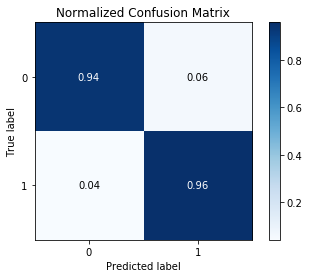

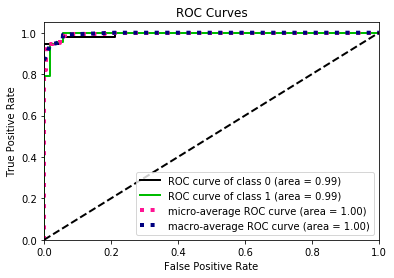

/usr/local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


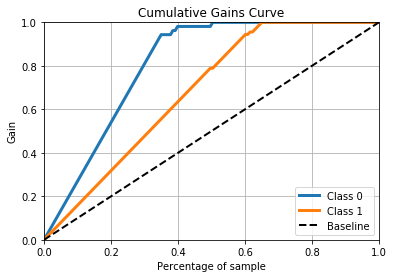

In [20]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train_scaled, y_train)
y_pred = ada_clf.predict(X_test_scaled)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()
y_probas = ada_clf.predict_proba(X_test_scaled)
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()
skplt.metrics.plot_cumulative_gain(y_test, y_probas)
plt.show()

## AdaBoost for Regression

Here we present [Drucker's AdaBoost](https://pdfs.semanticscholar.org/8d49/e2dedb817f2c3330e74b63c5fc86d2399ce3.pdf) tailored for regression.

In bagging, each training example is equally likely to be
picked. In boosting, the probability of a particular
example being in the training set of a particular machine
depends on the performance of the prior machines on
that example. The following is a modification of
Adaboost by Drucker.

Start by selecting a set of training data $n$ and assign to each entry a weight $w_i=1$ for $i=1,2,\dots,n$. As we have done earlier, we could pick say $80\%$ of the data set for training. The algorithm runs as follows:
1. We define the probability that the  training sample $i$ is in the set by $p_i = w_i/\sum_iw_i$. We pick $n$ samples (with replacement) to form our training set. We pick a number uniformly in the range $[0,\sum_iw_i]$.

2. We choose then a regression machine (for example plain linear regression or a simple decision tree). A given regression machine makes then a hypothesis.

3. Using every member of the training set with the chosen regression machine we obtain then a prediction $\tilde{y}_i$.

4. We calculate then the loss function $L_i$ for each training sample. We can use various types of loss function as long as we have a value

$L_i\in [0,1]$. 

## Gradient boosting: Basics with Steepest Descent

Gradient boosting is again a similar technique to Adaptive boosting,
it combines so-called weak classifiers or regressors into a strong
method via a series of iterations.

In order to understand the method, let us illustrate its basics by
bringing back the essential steps in linear regression, where our cost
function was the least squares function.

## The Squared-Error again! Steepest Descent

We start again with our cost function ${\cal C}(\boldsymbol{y}m\boldsymbol{f})=\sum_{i=0}^{n-1}{\cal L}(y_i, f(x_i))$ where we want to minimize
This means that for every iteration, we need to optimize

$$
(\hat{\boldsymbol{f}}) = \mathrm{argmin}_{\boldsymbol{f}}\hspace{0.1cm} \sum_{i=0}^{n-1}(y_i-f(x_i))^2.
$$

We define a real function $h_m(x)$ that defines our final function $f_M(x)$ as

$$
f_M(x) = \sum_{m=0}^M h_m(x).
$$

In the steepest decent approach we approximate $h_m(x) = -\rho_m g_m(x)$, where $\rho_m$ is a scalar and $g_m(x)$ the gradient defined as

$$
g_m(x_i) = \left[ \frac{\partial {\cal L}(y_i, f(x_i))}{\partial f(x_i)}\right]_{f(x_i)=f_{m-1}(x_i)}.
$$

With the new gradient we can update $f_m(x) = f_{m-1}(x) -\rho_m g_m(x)$. Using the above squared-error function we see that
the gradient is $g_m(x_i) = -2(y_i-f(x_i))$.

Choosing $f_0(x)=0$ we obtain $g_m(x) = -2y_i$ and inserting this into the minimization problem for the cost function we have

$$
(\rho_1) = \mathrm{argmin}_{\rho}\hspace{0.1cm} \sum_{i=0}^{n-1}(y_i+2\rho y_i)^2.
$$

## Steepest Descent Example

Optimizing with respect to $\rho$ we obtain (taking the derivative) that $\rho_1 = -1/2$. We have then that

$$
f_1(x) = f_{0}(x) -\rho_1 g_1(x)=-y_i.
$$

We can then proceed and compute

$$
g_2(x_i) = \left[ \frac{\partial {\cal L}(y_i, f(x_i))}{\partial f(x_i)}\right]_{f(x_i)=f_{1}(x_i)=y_i}=-4y_i,
$$

and find a new value for $\rho_2=-1/2$ and continue till we have reached $m=M$. We can modify the steepest descent method, or steepest boosting, by introducing what is called **gradient boosting**. 

## Gradient Boosting, algorithm

Suppose we have a cost function $C(f)=\sum_{i=0}^{n-1}L(y_i, f(x_i))$ where $y_i$ is our target and $f(x_i)$ the function which is meant to model $y_i$. The above cost function could be our standard  squared-error  function

$$
C(\boldsymbol{y},\boldsymbol{f})=\sum_{i=0}^{n-1}(y_i-f(x_i))^2.
$$

The way we proceed in an iterative fashion is to
1. Initialize our estimate $f_0(x)$.

2. For $m=1:M$, we

a. compute the negative gradient vector $\boldsymbol{u}_m = -\partial C(\boldsymbol{y},\boldsymbol{f})/\partial \boldsymbol{f}(x)$ at $f(x) = f_{m-1}(x)$;

b. fit the so-called base-learner to the negative gradient $h_m(u_m,x)$;

c. update the estimate $f_m(x) = f_{m-1}(x)+\nu h_m(u_m,x)$;


4. The final estimate is then $f_M(x) = \sum_{m=1}^M\nu h_m(u_m,x)$.

## Gradient Boosting, Examples of Regression

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Max depth: 1
Error: 0.6243999250190747
Bias^2: 0.33673797506242564
Var: 0.28766194995664895
0.6243999250190747 >= 0.33673797506242564 + 0.28766194995664895 = 0.6243999250190746
Max depth: 2
Error: 0.620334834102529
Bias^2: 0.3372728777789178
Var: 0.2830619563236112
0.620334834102529 >= 0.3372728777789178 + 0.2830619563236112 = 0.620334834102529
Max depth: 3
Error: 0.620318154435753
Bias^2: 0.3372679179286597
Var: 0.2830502365070932
0.620318154435753 >= 0.3372679179286597 + 0.2830502365070932 = 0.6203181544357529
Max depth: 4
Error: 0.6202754071949809
Bias^2: 0.3372656393374982
Var: 0.28300976785748266
0.6202754071949809 >= 0.3372656393374982 + 0.28300976785748266 = 0.6202754071949809
Max depth: 5
Error: 0.6203096254551488
Bias^2: 0.3372640883811819
Var: 0.28304553707396696
0.6203096254551488 >= 0.3372640883811819 + 0.28304553707396696 = 0.6203096254551488


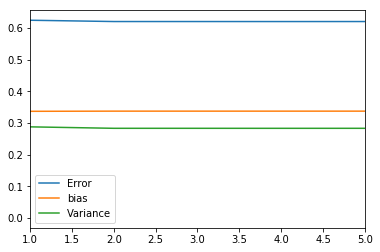

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
import scikitplot as skplt
from sklearn.metrics import mean_squared_error

n = 100
maxdegree = 6

# Make data set.
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)

error = np.zeros(maxdegree)
bias = np.zeros(maxdegree)
variance = np.zeros(maxdegree)
polydegree = np.zeros(maxdegree)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

for degree in range(1,maxdegree):
    model = GradientBoostingRegressor(max_depth=degree, n_estimators=100, learning_rate=1.0)  
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_test_scaled)
    polydegree[degree] = degree
    error[degree] = np.mean( np.mean((y_test - y_pred)**2) )
    bias[degree] = np.mean( (y_test - np.mean(y_pred))**2 )
    variance[degree] = np.mean( np.var(y_pred) )
    print('Max depth:', degree)
    print('Error:', error[degree])
    print('Bias^2:', bias[degree])
    print('Var:', variance[degree])
    print('{} >= {} + {} = {}'.format(error[degree], bias[degree], variance[degree], bias[degree]+variance[degree]))

plt.xlim(1,maxdegree-1)
plt.plot(polydegree, error, label='Error')
plt.plot(polydegree, bias, label='bias')
plt.plot(polydegree, variance, label='Variance')
plt.legend()
save_fig("gdregression")
plt.show()

## Gradient Boosting, Classification Example

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import  train_test_split 
from sklearn.datasets import load_breast_cancer
import scikitplot as skplt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate

# Load the data
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,random_state=0)
print(X_train.shape)
print(X_test.shape)
#now scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

gd_clf = GradientBoostingClassifier(max_depth=3, n_estimators=100, learning_rate=1.0)  
gd_clf.fit(X_train_scaled, y_train)
#Cross validation
accuracy = cross_validate(gd_clf,X_test_scaled,y_test,cv=10)['test_score']
print(accuracy)
print("Test set accuracy with Random Forests and scaled data: {:.2f}".format(gd_clf.score(X_test_scaled,y_test)))

import scikitplot as skplt
y_pred = gd_clf.predict(X_test_scaled)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
save_fig("gdclassiffierconfusion")
plt.show()
y_probas = gd_clf.predict_proba(X_test_scaled)
skplt.metrics.plot_roc(y_test, y_probas)
save_fig("gdclassiffierroc")
plt.show()
skplt.metrics.plot_cumulative_gain(y_test, y_probas)
save_fig("gdclassiffiercgain")
plt.show()

## XGBoost: Extreme Gradient Boosting


[XGBoost](https://github.com/dmlc/xgboost) or Extreme Gradient
Boosting, is an optimized distributed gradient boosting library
designed to be highly efficient, flexible and portable. It implements
machine learning algorithms under the Gradient Boosting
framework. XGBoost provides a parallel tree boosting that solve many
data science problems in a fast and accurate way. See the [article by Chen and Guestrin](https://arxiv.org/abs/1603.02754).

The authors design and build a highly scalable end-to-end tree
boosting system. It has  a theoretically justified weighted quantile
sketch for efficient proposal calculation. It introduces a novel sparsity-aware algorithm for parallel tree learning and an effective cache-aware block structure for out-of-core tree learning.

It is now the algorithm which wins essentially all ML competitions!!!

## Regression Case

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
import scikitplot as skplt
from sklearn.metrics import mean_squared_error

n = 100
maxdegree = 6

# Make data set.
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)

error = np.zeros(maxdegree)
bias = np.zeros(maxdegree)
variance = np.zeros(maxdegree)
polydegree = np.zeros(maxdegree)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

for degree in range(maxdegree):
    model =  xgb.XGBRegressor(objective ='reg:squarederror', colsaobjective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = degree, alpha = 10, n_estimators = 200)

    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_test_scaled)
    polydegree[degree] = degree
    error[degree] = np.mean( np.mean((y_test - y_pred)**2) )
    bias[degree] = np.mean( (y_test - np.mean(y_pred))**2 )
    variance[degree] = np.mean( np.var(y_pred) )
    print('Max depth:', degree)
    print('Error:', error[degree])
    print('Bias^2:', bias[degree])
    print('Var:', variance[degree])
    print('{} >= {} + {} = {}'.format(error[degree], bias[degree], variance[degree], bias[degree]+variance[degree]))

plt.xlim(1,maxdegree-1)
plt.plot(polydegree, error, label='Error')
plt.plot(polydegree, bias, label='bias')
plt.plot(polydegree, variance, label='Variance')
plt.legend()
plt.show()

## Xgboost on the Cancer Data

As you will see from the confusion matrix below, XGBoots does an excellent job on the Wisconsin cancer data and outperforms essentially all agorithms we have discussed till now.

In [15]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import  train_test_split 
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
import scikitplot as skplt
import xgboost as xgb
# Load the data
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,random_state=0)
print(X_train.shape)
print(X_test.shape)
#now scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

xg_clf = xgb.XGBClassifier()
xg_clf.fit(X_train_scaled,y_train)

y_test = xg_clf.predict(X_test_scaled)

print("Test set accuracy with Random Forests and scaled data: {:.2f}".format(xg_clf.score(X_test_scaled,y_test)))

import scikitplot as skplt
y_pred = xg_clf.predict(X_test_scaled)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
save_fig("xdclassiffierconfusion")
plt.show()
y_probas = xg_clf.predict_proba(X_test_scaled)
skplt.metrics.plot_roc(y_test, y_probas)
save_fig("xdclassiffierroc")
plt.show()
skplt.metrics.plot_cumulative_gain(y_test, y_probas)
save_fig("gdclassiffiercgain")
plt.show()


xgb.plot_tree(xg_clf,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
save_fig("xgtree")
plt.show()

xgb.plot_importance(xg_clf)
plt.rcParams['figure.figsize'] = [5, 5]
save_fig("xgparams")
plt.show()